In [1]:
# 1 => Rice_Cammeo_Osmancik.xlsx
# 2 => Synthetic-Infant-Health-Data.csv
# 3 => wine-new.csv

In [2]:
# steps =>

# 1. import data
# 2. data cleaning -> inconsistencies, missing values
# 3. Exploratory data analysis
# 4. Outlier detection and removal
# 5. Data balancing / Resampling
# 6. feature selection/ dimensionality reduction
# 7. Feature scaling
# 8. cross validation
# 9. Algorithms and hyperpara tuning
# 10. model building
# 11. predictions
# 12. deployment

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 1 => Rice_Cammeo_Osmancik.xlsx
# 2 => Synthetic-Infant-Health-Data.csv
# 3 => wine-new.csv

In [5]:
df = pd.read_csv('grapes_new.csv')
df.head()

,COLOR_INTENSITY,SHAPE,RIPENESS_PER,ALCOHOL_PER,MALIC_ACID_PER,ASH,ALCALINITY_OF_ASH,MAGNESIUM_MEASURE,TOTAL_PHENOLS,FLAVANOIDS,...,HUE,PROLINE,TEMPERATURE,AVG_HUMIDITY,FERT_NITRO_PER,WATER_O2_PER,WATER_PH,FER_P2O5_PER,SOIL_TYPE,CLASS
0,120.53,elliptical,16.73,14.23,1.71,2.43,15.6,127,2.80,3.06,...,1.04,1065,23.34,54.99,31.21,97.67,7.71,52.02,archean,High
1,112.57,elliptical,20.30,13.20,1.78,2.14,11.2,100,2.65,2.76,...,1.05,1050,23.40,51.91,31.28,99.05,7.66,48.18,archean,High
2,120.78,elliptical,20.81,13.16,2.36,2.67,18.6,101,2.80,3.24,...,1.03,1185,22.29,50.69,31.92,97.95,7.66,28.15,archean,High
3,134.17,elliptical,19.47,14.37,1.95,2.50,16.8,113,3.85,3.49,...,0.86,1480,21.28,47.72,31.79,95.46,7.21,55.95,alluvial,High
4,112.19,round,17.57,13.24,2.59,2.87,21.0,118,2.80,2.69,...,1.04,735,23.76,45.09,31.86,94.45,7.80,55.99,archean,High


In [6]:
df.shape

(194, 21)

## Data Cleaning

In [8]:
df.columns

Index(['COLOR_INTENSITY', 'SHAPE', 'RIPENESS_PER', 'ALCOHOL_PER',
       'MALIC_ACID_PER', 'ASH', 'ALCALINITY_OF_ASH', 'MAGNESIUM_MEASURE',
       'TOTAL_PHENOLS', 'FLAVANOIDS', 'PROANTHOCYANINS', 'HUE', 'PROLINE',
       'TEMPERATURE', 'AVG_HUMIDITY', 'FERT_NITRO_PER', 'WATER_O2_PER',
       'WATER_PH', 'FER_P2O5_PER', 'SOIL_TYPE', 'CLASS'],
      dtype='object')

In [9]:
df.columns = df.columns.str.strip()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   COLOR_INTENSITY    194 non-null    float64
 1   SHAPE              194 non-null    object 
 2   RIPENESS_PER       192 non-null    float64
 3   ALCOHOL_PER        191 non-null    float64
 4   MALIC_ACID_PER     194 non-null    float64
 5   ASH                194 non-null    float64
 6   ALCALINITY_OF_ASH  188 non-null    float64
 7   MAGNESIUM_MEASURE  194 non-null    int64  
 8   TOTAL_PHENOLS      194 non-null    float64
 9   FLAVANOIDS         194 non-null    float64
 10  PROANTHOCYANINS    194 non-null    float64
 11  HUE                192 non-null    float64
 12  PROLINE            194 non-null    int64  
 13  TEMPERATURE        194 non-null    float64
 14  AVG_HUMIDITY       194 non-null    float64
 15  FERT_NITRO_PER     194 non-null    float64
 16  WATER_O2_PER       190 non

In [11]:
df.isna().sum()

COLOR_INTENSITY      0
SHAPE                0
RIPENESS_PER         2
ALCOHOL_PER          3
MALIC_ACID_PER       0
ASH                  0
ALCALINITY_OF_ASH    6
MAGNESIUM_MEASURE    0
TOTAL_PHENOLS        0
FLAVANOIDS           0
PROANTHOCYANINS      0
HUE                  2
PROLINE              0
TEMPERATURE          0
AVG_HUMIDITY         0
FERT_NITRO_PER       0
WATER_O2_PER         4
WATER_PH             0
FER_P2O5_PER         0
SOIL_TYPE            0
CLASS                0
dtype: int64

In [12]:
df.ffill(inplace=True)

In [13]:
df.isnull().sum()

COLOR_INTENSITY      0
SHAPE                0
RIPENESS_PER         0
ALCOHOL_PER          0
MALIC_ACID_PER       0
ASH                  0
ALCALINITY_OF_ASH    0
MAGNESIUM_MEASURE    0
TOTAL_PHENOLS        0
FLAVANOIDS           0
PROANTHOCYANINS      0
HUE                  0
PROLINE              0
TEMPERATURE          0
AVG_HUMIDITY         0
FERT_NITRO_PER       0
WATER_O2_PER         0
WATER_PH             0
FER_P2O5_PER         0
SOIL_TYPE            0
CLASS                0
dtype: int64

In [14]:
# separate input and output

In [15]:
x = df.drop('CLASS', axis = 1)
y = df['CLASS']

## EDA

In [17]:
x.describe()

,COLOR_INTENSITY,RIPENESS_PER,ALCOHOL_PER,MALIC_ACID_PER,ASH,ALCALINITY_OF_ASH,MAGNESIUM_MEASURE,TOTAL_PHENOLS,FLAVANOIDS,PROANTHOCYANINS,HUE,PROLINE,TEMPERATURE,AVG_HUMIDITY,FERT_NITRO_PER,WATER_O2_PER,WATER_PH,FER_P2O5_PER
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,116.882113,21.508557,13.038454,2.335103,2.365361,19.570619,99.680412,2.296649,2.016856,1.577216,0.956866,754.164948,26.418247,50.976082,30.562216,90.349381,7.680979,42.195155
std,14.333204,2.374497,0.815124,1.118041,0.268158,3.441775,14.252749,0.634317,1.001351,0.565445,0.227370,316.093797,3.042364,3.367880,1.126867,5.438735,0.509935,10.398205
min,93.000000,16.170000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.410000,0.480000,278.000000,21.020000,44.230000,27.670000,80.360000,6.510000,20.000000
25%,105.470000,20.372500,12.370000,1.610000,2.210000,17.200000,88.000000,1.725000,1.092500,1.225000,0.790000,504.000000,24.222500,48.360000,29.932500,85.862500,7.252500,33.742500
50%,114.910000,21.800000,13.050000,1.865000,2.360000,19.500000,97.500000,2.355000,2.135000,1.545000,0.980000,675.000000,26.195000,51.145000,30.710000,90.550000,7.670000,44.820000
75%,124.060000,23.317500,13.705000,3.082500,2.547500,21.500000,107.000000,2.800000,2.875000,1.950000,1.117500,988.750000,28.737500,53.722500,31.382500,94.897500,8.127500,50.542500
max,167.000000,25.200000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,3.580000,1.710000,1680.000000,32.340000,57.950000,34.160000,99.770000,8.500000,60.870000


In [18]:
x.shape

(194, 20)

In [19]:
one = df.iloc[:, :4]
one['CLASS'] = y
two = df.iloc[:, 4:8]
two['CLASS'] = y
three = df.iloc[:, 8:12]
three['CLASS'] = y
four = df.iloc[:, 12:16]
four['CLASS'] = y
five = df.iloc[:, 16:20]
five['CLASS'] = y

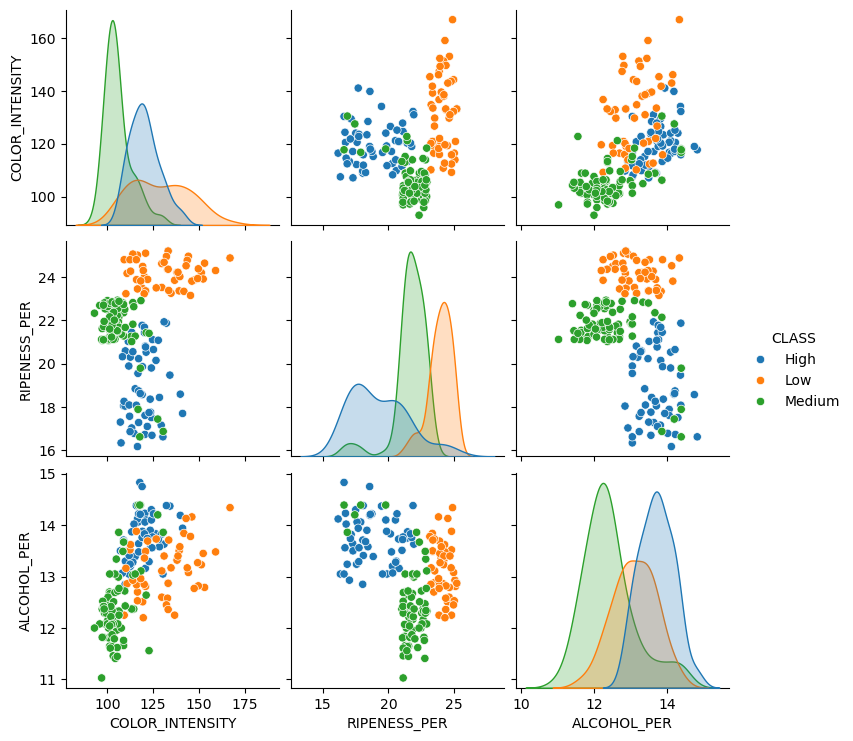

In [20]:
sns.pairplot(one, hue = 'CLASS');

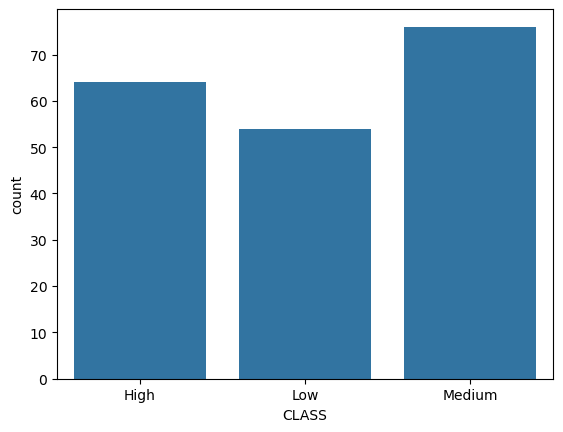

In [21]:
# check for data balance

sns.countplot(x = y);

## Outlier Detection and Removal

In [23]:
x.dtypes

COLOR_INTENSITY      float64
SHAPE                 object
RIPENESS_PER         float64
ALCOHOL_PER          float64
MALIC_ACID_PER       float64
ASH                  float64
ALCALINITY_OF_ASH    float64
MAGNESIUM_MEASURE      int64
TOTAL_PHENOLS        float64
FLAVANOIDS           float64
PROANTHOCYANINS      float64
HUE                  float64
PROLINE                int64
TEMPERATURE          float64
AVG_HUMIDITY         float64
FERT_NITRO_PER       float64
WATER_O2_PER         float64
WATER_PH             float64
FER_P2O5_PER         float64
SOIL_TYPE             object
dtype: object

In [24]:
# one hot enode

x = pd.get_dummies(x, drop_first= True)

In [25]:
col_order_ohe = x.columns.tolist()

In [26]:
col_order_ohe;

In [27]:
# isolation forest for outlier removal

In [28]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination= 0.05, random_state= 0)

In [29]:
clean = iso.fit_predict(x)

In [30]:
clean

array([ 1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1])

In [31]:
x = x[clean == 1]
y = y[clean == 1]

In [32]:
x.shape

(184, 20)

## Sampling (over sampling)

In [34]:
y.shape

(184,)

In [35]:
y.value_counts()

CLASS
Medium    72
High      63
Low       49
Name: count, dtype: int64

In [36]:
# imbalanced-learn

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
smote = SMOTE(k_neighbors= 5)

In [39]:
x_res, y_res = smote.fit_resample(x, y)

In [40]:
y_res.value_counts()

CLASS
High      72
Low       72
Medium    72
Name: count, dtype: int64

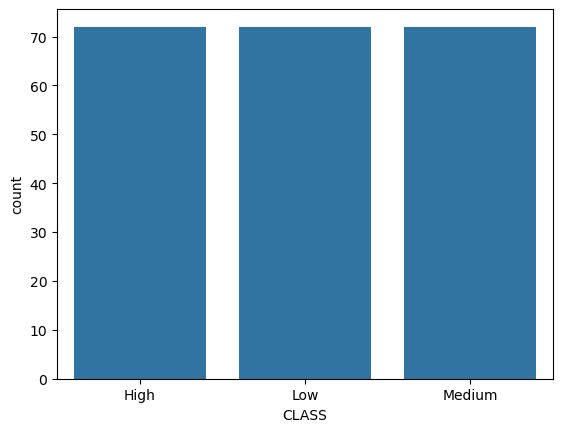

In [41]:
sns.countplot(x = y_res);

## Feature Selection

In [43]:
from sklearn.feature_selection import SelectKBest, chi2

In [44]:
skf = SelectKBest(k = 5, score_func = chi2)

In [45]:
x_new = skf.fit_transform(x_res, y_res)

In [46]:
x_new.shape

(216, 5)

In [47]:
skf.get_support();

In [103]:
x = x_res.loc[:,skf.get_support()]

In [105]:
x;

In [109]:
x.shape, y_res.shape

((216, 5), (216,))

In [111]:
x.describe()

,COLOR_INTENSITY,FLAVANOIDS,PROLINE,TEMPERATURE,FER_P2O5_PER
count,216.000000,216.000000,216.000000,216.000000,216.000000
mean,117.094881,1.917717,758.037037,26.545682,41.599584
std,13.391676,0.991653,305.505602,3.117409,9.919443
min,93.000000,0.470000,278.000000,21.020000,20.000000
25%,106.390000,0.969276,514.750000,24.060000,33.784719
50%,115.766816,2.005000,679.000000,26.340000,43.084743
75%,124.060000,2.766688,1012.000000,29.137957,48.905000
max,153.110000,3.930000,1680.000000,32.340000,60.870000


## Feature Scaling

In [114]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

## cross validation

In [116]:
x_scaled.shape

(216, 5)

In [122]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_res,
                                                   random_state= 0,
                                                   test_size= 0.2,
                                                   stratify= y_res)

In [124]:
x_train.shape, y_train.shape

((172, 5), (172,))

In [126]:
x_test.shape, y_test.shape

((44, 5), (44,))

## Buid the model

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [135]:
params = {'random_state': [0, 42],
         'criterion': ['gini', 'entropy'],
         'max_features': ['sqrt', 'log2'],
         'n_estimators': [20, 30, 100]}

In [137]:
grid = GridSearchCV(estimator= RandomForestClassifier(),
                   param_grid= params,
                   scoring = 'accuracy',
                   cv = 5)

In [139]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [20, 30, 100],
                         'random_state': [0, 42]},
             scoring='accuracy')

In [141]:
y_pred = grid.predict(x_test)

In [143]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

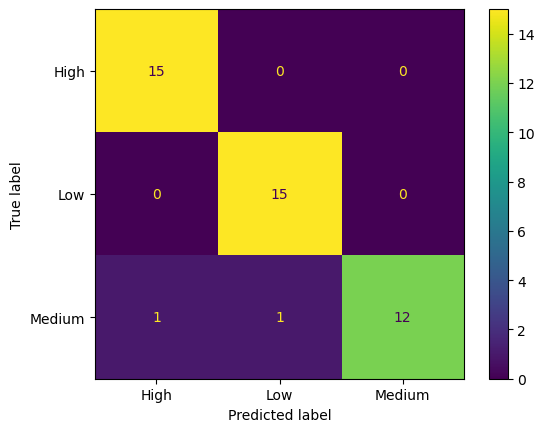

In [145]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [147]:
42/44

0.9545454545454546

In [149]:
accuracy_score(y_test, y_pred)

0.9545454545454546

In [151]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.94      1.00      0.97        15
         Low       0.94      1.00      0.97        15
      Medium       1.00      0.86      0.92        14

    accuracy                           0.95        44
   macro avg       0.96      0.95      0.95        44
weighted avg       0.96      0.95      0.95        44



In [153]:
grid.best_params_

{'criterion': 'gini',
 'max_features': 'sqrt',
 'n_estimators': 100,
 'random_state': 0}

In [159]:
grid.best_estimator_

RandomForestClassifier(random_state=0)

## Serialize

In [162]:
import joblib

In [164]:
# save the model

joblib.dump(grid, 'rf_classifier.pkl')

['rf_classifier.pkl']

In [166]:
joblib.dump(scaler, 'rf_scaler.pkl')

['rf_scaler.pkl']

In [168]:
x.columns

Index(['COLOR_INTENSITY', 'FLAVANOIDS', 'PROLINE', 'TEMPERATURE',
       'FER_P2O5_PER'],
      dtype='object')

In [170]:
x

,COLOR_INTENSITY,FLAVANOIDS,PROLINE,TEMPERATURE,FER_P2O5_PER
0,120.530000,3.060000,1065,23.340000,52.020000
1,112.570000,2.760000,1050,23.400000,48.180000
2,120.780000,3.240000,1185,22.290000,28.150000
3,112.190000,2.690000,735,23.760000,55.990000
4,127.540000,3.390000,1450,22.230000,39.860000
...,...,...,...,...,...
211,112.648155,1.200786,629,29.090610,34.628683
212,110.941201,0.552758,830,29.087972,34.824287
213,143.461402,0.985701,556,32.188069,34.548222
214,146.706029,0.685766,675,31.922577,43.009486
